<a href="https://colab.research.google.com/github/dk3156/Dongje-Kim-CS4613/blob/main/hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `jax` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions. .

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

## Question 1b (10 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?


Q1 a) 

Using binomial probability mass function

${n \choose k} \left(p\right)^{k} \left(1 - p\right)^{n - k} $

where n = 50, k = 25, p = 1/2, we get probability of

${50 \choose 25} \left(\frac{1}{2}\right)^{25} \left(\frac{1}{2}\right)^{25} = 0.11227517$

b)

sample mean = np = 50 * 0.5 = 25

variance = np(1-p) = 50 * 0.5 * 0.5 = 12.5

standard deviation = $\sqrt{12.5}$ = 3.54

By Central Limit Theorem, we approximate P(x=25) using Gaussian distribution.

z-score(Y = 25.5) = (25.5 - 25) / 3.54 = 0.14

P(X $\leq$ 25.5) = 0.5557

z-score(Y = 24.5) = (24.5 - 25) / 3.54 = -0.14

P(X $\leq$ 24.5) = 1 - 0.5557 = 0.4443

P(X = 25) = 0.5557 - 0.4443 = 0.1114

Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`


## Question 2 (20 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

Case 1: coin flip is H -> with probability of (1/2)

(1 / 2) * P(0 from Urn 0) * P(0 from Urn 0) * P(1 from Urn 0) * P(1 from Urn 1)

(1 / 2) * (1 / 3) * (1 / 3) * (2 / 3) * (1 / 6) = 0.006

Case 2: coin flip is T -> with probability of (1/2)

(1 / 2) * P(0 from Urn 1) * P(0 from Urn 0) * P(1 from Urn 0) * P( 1 from Urn 1)

(1 / 2) * (5 / 6) * (1 / 3) * (2 / 3) * (1 / 6) = 0.015

Total probability of getting 0011 = 0.006 + 0.015 = 0.021





## Question 3 (20 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


[[ 0.54772256  0.        ]
 [-1.82574186  1.29099445]]


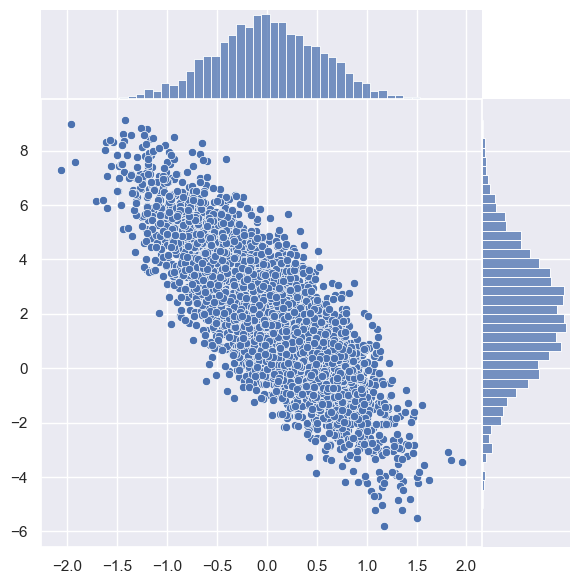

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Define dimension. 
d = 2

# Set mean vector. 
m = np.array([0, 2]).reshape(2, 1)

# Set covariance function. 
K_0 = np.array([[0.3, -1],
                [-1, 5]])

#Cholesky factorization
L = np.linalg.cholesky(K_0)
print(L)

# Number of samples. 
n = 5000
u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)

x = m + np.dot(L, u)
 
sns.jointplot(x=x[0], y=x[1], kind="scatter", space=0);


## Question 4 (20 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


array([[<AxesSubplot: title={'center': 'Brooklyn Bridge'}>]], dtype=object)

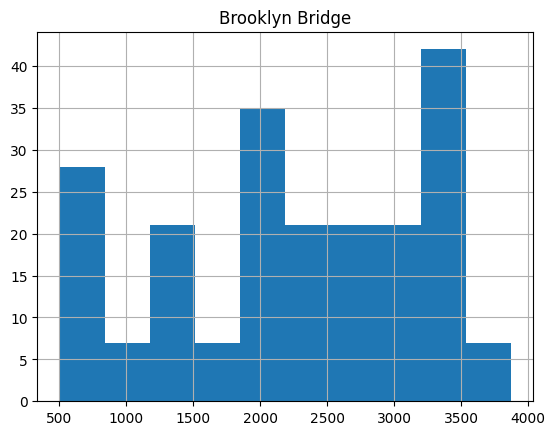

In [ ]:
#Q1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

# Path of the file to read
filepath = "input/nyc-east-river-bicycle-counts.csv"

dataset = pd.read_csv(filepath)
dataset.hist(column = "Brooklyn Bridge")

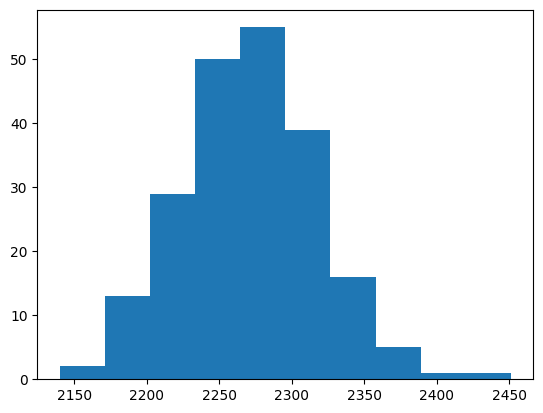

In [ ]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from decimal import Decimal

def poisson(lam):
    lam = Decimal(lam)
    el, n, u = Decimal(np.exp(-lam)), Decimal(0), Decimal(np.random.uniform(0,1))
    pp, fact, pow = el, Decimal(1), Decimal(1)

    while u > pp :
        n = n + 1
        fact, pow = n * fact, lam * pow
        pp = pp + (pow / fact) * el
        
    return n 

u = dataset["Brooklyn Bridge"].mean()
datalist = []
for i in range(211):
    n = poisson(u)
    datalist.append(n)
    
plt.hist(datalist)
plt.show()

# Question 5 (20 points)

You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process. 


Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $\lambda=[1, 3, 4]$ and the service time of the requests as an exponential random variable with rate $\mu=4$. 

   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def arrival(num):
    return np.random.poisson(num)
    
def service(num):
    return round(np.random.exponential(num))

def MM1(lam):
    arrival_t = arrival(lam)
    service_t = service(lam)
    request = 0
    queue = []
    amount_waiting = []
    for i in range(1000):
        amount_waiting.append(len(queue))
        if arrival_t <= 0:
            queue.append(request)
            request += 1
            arrival_t = arrival(lam)
        else:
            arrival_t -= 1
        if service_t <= 0:
            if len(queue) != 0:
                queue.pop(0)
            service_t = service(4)
        else:
            service_t -= 1
            
    return amount_waiting


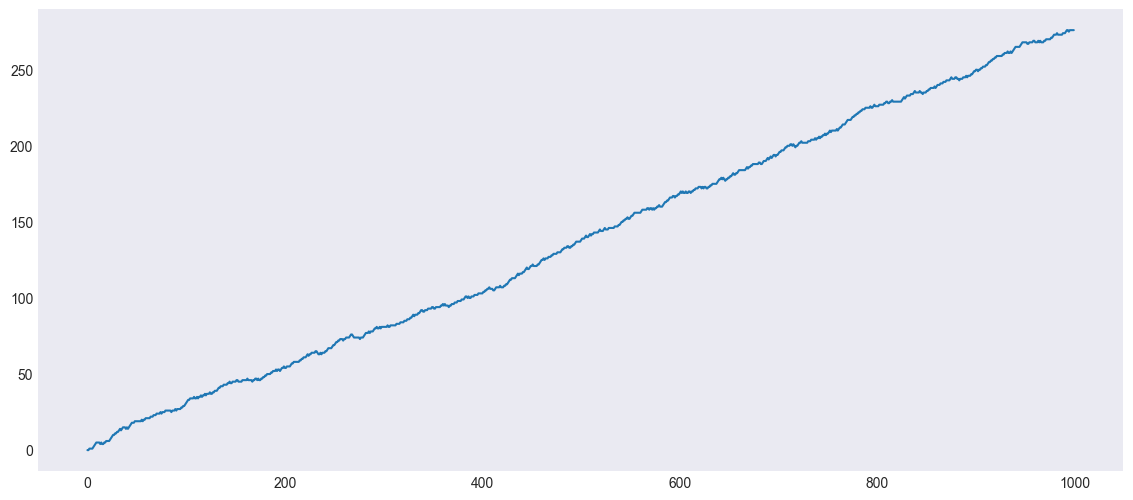

In [ ]:
plt.plot(MM1(1))

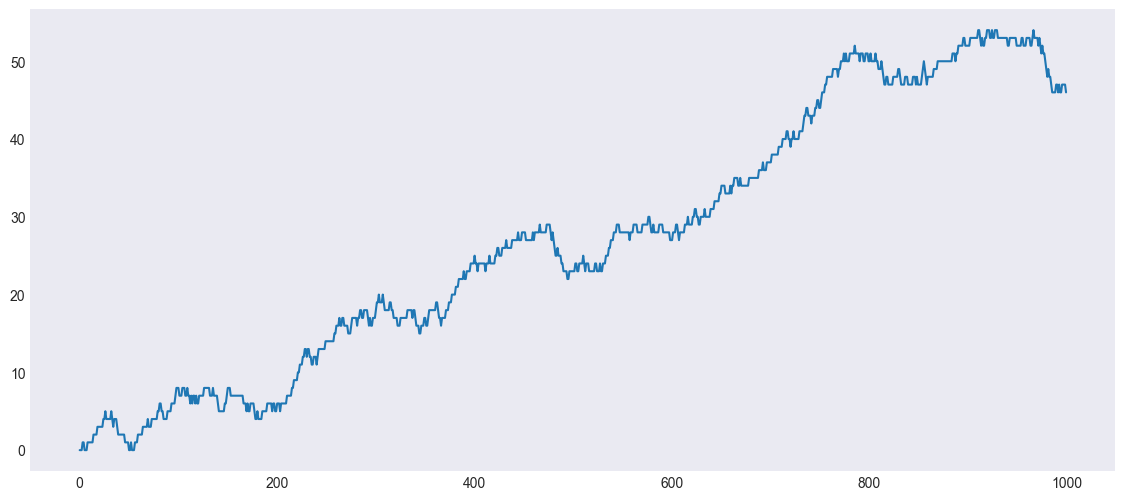

In [ ]:
plt.plot(MM1(3))

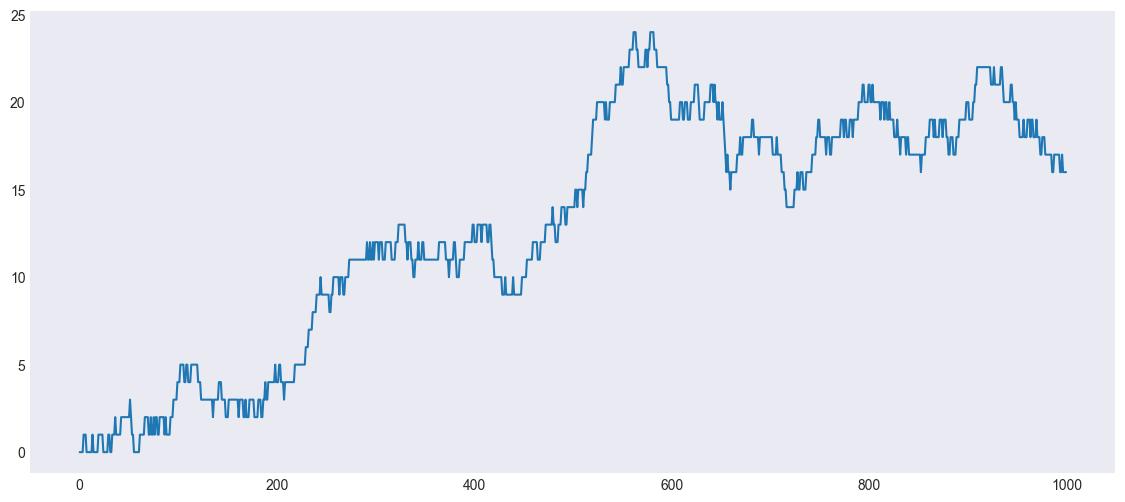

In [ ]:
plt.plot(MM1(4))